### XAI Credit Risk Analysis

**Exploratory Data Analysis**

This notebook explores the German Credit dataset to understand data quality, feature distributions, class balance, and potential relationships relevant for downstream modeling and explainability analysis.


In [1]:
# Importing necessary libraries
import pandas as pd
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Fetching the Statlog (German Credit Data) dataset
statlog_german_credit_data = fetch_ucirepo(id=144) 
# Features and targets
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 

In [3]:
# Variable information 
statlog_german_credit_data.variables

,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,None,Status of existing checking account,None,no
1,Attribute2,Feature,Integer,None,Duration,months,no
2,Attribute3,Feature,Categorical,None,Credit history,None,no
3,Attribute4,Feature,Categorical,None,Purpose,None,no
4,Attribute5,Feature,Integer,None,Credit amount,None,no
5,Attribute6,Feature,Categorical,None,Savings account/bonds,None,no
6,Attribute7,Feature,Categorical,Other,Present employment since,None,no
7,Attribute8,Feature,Integer,None,Installment rate in percentage of disposable i...,None,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,None,no
9,Attribute10,Feature,Categorical,None,Other debtors / guarantors,None,no


In [4]:
type(statlog_german_credit_data)

ucimlrepo.dotdict.dotdict

In [5]:
# Merging features and target into a single DataFrame
df = pd.concat([X, y], axis=1)

In [6]:
df.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [7]:
# Adding column names for better readability
columns = [
    "Status_checking", "Duration", "Credit_history", "Purpose",
    "Credit_amount", "Savings", "Employment", "Installment_rate",
    "Personal_status", "Other_debtors", "Residence_since", "Property",
    "Age", "Other_installment_plans", "Housing",
    "Number_existing_credits", "Job", "Number_people_liable",
    "Telephone", "Foreign_worker", "class"
]
df.columns = columns

In [8]:
df.sample(5)

,Status_checking,Duration,Credit_history,Purpose,Credit_amount,Savings,Employment,Installment_rate,Personal_status,Other_debtors,...,Property,Age,Other_installment_plans,Housing,Number_existing_credits,Job,Number_people_liable,Telephone,Foreign_worker,class
788,A12,48,A33,A46,6224,A61,A75,4,A93,A101,...,A124,50,A143,A153,1,A173,1,A191,A201,2
559,A12,18,A34,A42,1928,A61,A72,2,A93,A101,...,A121,31,A143,A152,2,A172,1,A191,A201,2
821,A13,12,A32,A43,3016,A61,A73,3,A94,A101,...,A123,24,A143,A152,1,A173,1,A191,A201,1
320,A12,30,A34,A40,4249,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2
191,A12,48,A30,A49,3844,A62,A74,4,A93,A101,...,A124,34,A143,A153,1,A172,2,A191,A201,2


In [9]:
# Mapping categorical codes to descriptive labels
maps = {
    "Status_checking": {
        "A11": "< 0 DM",
        "A12": "0 <= balance < 200 DM",
        "A13": ">= 200 DM / salary assigned >= 1 year",
        "A14": "No checking account"
    },
    "Credit_history": {
        "A30": "No credits taken / all credits paid back duly",
        "A31": "All credits at this bank paid back duly",
        "A32": "Existing credits paid back duly till now",
        "A33": "Delay in paying off in the past",
        "A34": "Critical account / other credits existing"
    },
    "Purpose": {
        "A40": "Car (new)",
        "A41": "Car (used)",
        "A42": "Furniture / equipment",
        "A43": "Radio / television",
        "A44": "Domestic appliances",
        "A45": "Repairs",
        "A46": "Education",
        "A47": "Vacation (rare)",
        "A48": "Retraining",
        "A49": "Business",
        "A410": "Others"
    },
    "Savings": {
        "A61": "< 100 DM",
        "A62": "100 <= savings < 500 DM",
        "A63": "500 <= savings < 1000 DM",
        "A64": ">= 1000 DM",
        "A65": "Unknown / no savings"
    },
    "Employment": {
        "A71": "Unemployed",
        "A72": "< 1 year",
        "A73": "1 <= employment < 4 years",
        "A74": "4 <= employment < 7 years",
        "A75": ">= 7 years"
    },
    "Personal_status": {
        "A91": "Male: divorced/separated",
        "A92": "Female: divorced/separated/married",
        "A93": "Male: single",
        "A94": "Male: married/widowed",
        "A95": "Female: single"
    },
    "Other_debtors": {
        "A101": "None",
        "A102": "Co-applicant",
        "A103": "Guarantor"
    },
    "Property": {
        "A121": "Real estate",
        "A122": "Building society savings / life insurance",
        "A123": "Car or other (not savings)",
        "A124": "Unknown / no property"
    },
    "Other_installment_plans": {
        "A141": "Bank",
        "A142": "Stores",
        "A143": "None"
    },
    "Housing": {
        "A151": "Rent",
        "A152": "Own",
        "A153": "For free"
    },
    "Job": {
        "A171": "Unemployed / unskilled resident",
        "A172": "Unskilled non-resident",
        "A173": "Skilled",
        "A174": "Highly skilled"
    },
    "Telephone": {
        "A191": "None",
        "A192": "Yes, registered"
    },
    "Foreign_worker": {
        "A201": "Yes",
        "A202": "No"
    },
}

for col, mapping in maps.items():
    if col in df.columns:
        df[col] = df[col].map(mapping).fillna(df[col])

In [10]:
df.shape

(1000, 21)

The dataset contains 1,000 observations with 20 features and 1 target variable.

In [11]:
# Changing target variable from 1,2 to binary
df["class"] = df["class"].map({1: 1, 2: 0})

In [12]:
# Checking for missing values
df.isna().sum()

Status_checking            0
Duration                   0
Credit_history             0
Purpose                    0
Credit_amount              0
Savings                    0
Employment                 0
Installment_rate           0
Personal_status            0
Other_debtors              0
Residence_since            0
Property                   0
Age                        0
Other_installment_plans    0
Housing                    0
Number_existing_credits    0
Job                        0
Number_people_liable       0
Telephone                  0
Foreign_worker             0
class                      0
dtype: int64

The dataset contains no missing values, simplifying preprocessing requirements.


In [13]:
# Categorical and numerical features
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns
# Summary statistics of numerical features
df[numeric_cols].describe()

,Duration,Credit_amount,Installment_rate,Residence_since,Age,Number_existing_credits,Number_people_liable,class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


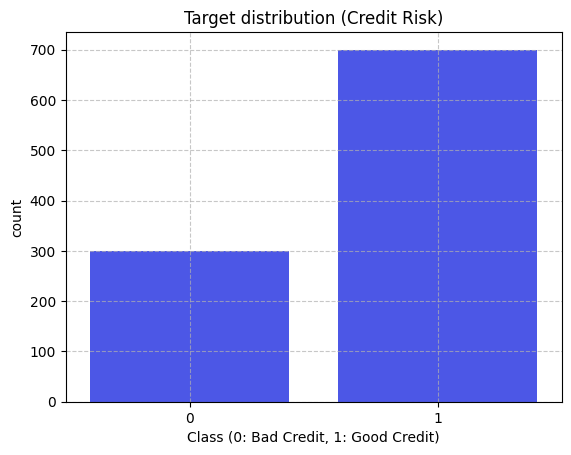

In [14]:
# Target balance
sns.countplot(x="class", data=df,color="#3341FFE8")
plt.title("Target distribution (Credit Risk)")
plt.grid(linestyle='--', alpha=0.7)
plt.xlabel("Class (0: Bad Credit, 1: Good Credit)")
plt.show()

- The target variable is moderately imbalanced, with a higher proportion of good credit cases. 
- This imbalance should be considered in later modeling and evaluation stages.


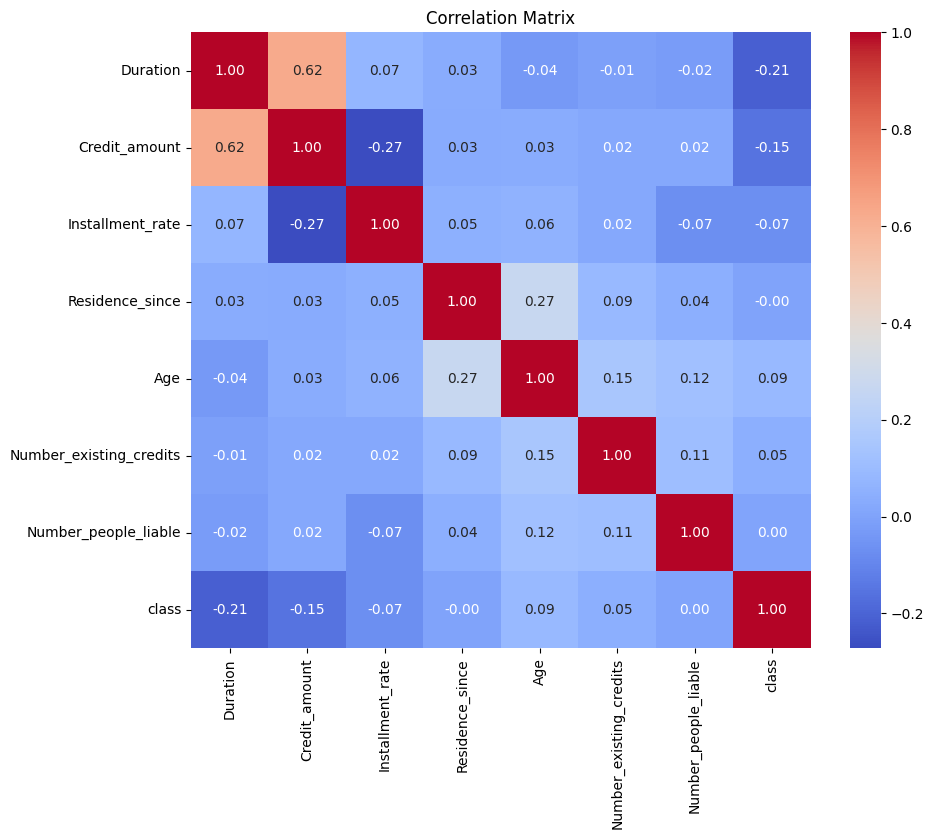

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


- Most numeric features show weak pairwise correlations, indicating low multicollinearity. 
- Loan duration and credit amount exhibit the strongest positive relationship and may jointly influence credit risk.


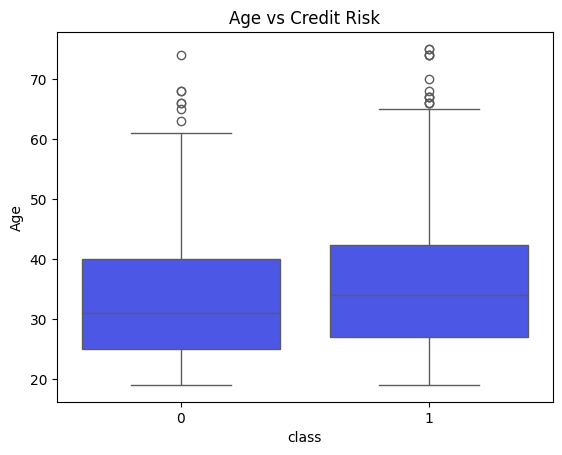

In [16]:
# Target vs Age distribution
sns.boxplot(x="class", y="Age", data=df,color="#3341FFE8")
plt.title("Age vs Credit Risk")
plt.show()

- Applicants with **good credit (class 1)** tend to be **slightly older** than those with bad credit (class 0), but the distributions overlap heavily.
- Age alone has **limited predictive power** and should be interpreted in combination with other features.


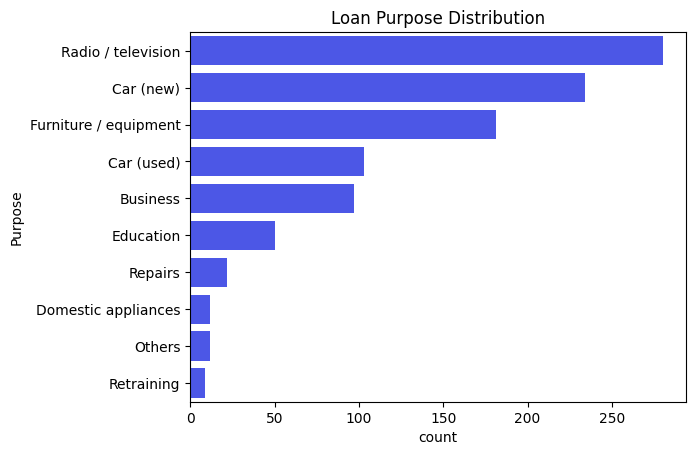

In [17]:
sns.countplot(y="Purpose", data=df,
              order=df["Purpose"].value_counts().index,color="#3341FFE8")
plt.title("Loan Purpose Distribution")
plt.show()


- Loan purposes are highly imbalanced, with a few categories (e.g., A43, A40, A42) accounting for most applications.

- Several purposes are rarely observed, which may require grouping or careful encoding to avoid sparse features.

In [18]:
# Exporting cleaned data
df.to_csv("statlog_german_credit_data.csv", index=False)